In [4]:
#importing useful libraries
import quandl
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.preprocessing
quandl.ApiConfig.api_key = "p5X-vcFGhbFdcq2jXeN3"
%matplotlib inline


In [5]:
#assign the kind of stock option to use to the variable, df. 'TSLA' could be replaced by any stock option
df = quandl.get("WIKI/TSLA")


In [6]:
#printing out the data frame from the chosen stock option
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0


In [7]:
#for our prediction, we need only the 'Adj. Close' column hence, reassigning df to the needed column
df = df[['Adj. Close']]

In [8]:
#printing out our data 
df

,Adj. Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11
...,...
2018-03-21,316.53
2018-03-22,309.10
2018-03-23,301.54


In [9]:
#setting the number of days 
forecast_out = int(30) # predicting 30 days into future


In [10]:
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) #  label column with data shifted 30 units up


<ipython-input-10-99476ec06d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) #  label column with data shifted 30 units up


In [108]:
# defining features and labels

In [11]:
X = np.array(df.drop(['Prediction'], 1))

In [13]:
X = sklearn.preprocessing.scale(X)

In [14]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30

In [15]:
X = X[:-forecast_out] # remove last 30 from X

In [16]:
y = np.array(df['Prediction'])

In [17]:
y = y[:-forecast_out]

In [116]:
#working out the linear regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
accuracy = clf.score(X_test, y_test)
print("accuracy: ", accuracy)

accuracy:  0.949985132017208


In [20]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[323.797766   322.4821837  333.93749473 335.32616493 334.62452104
 333.1919981  345.73388265 351.46397443 356.69706846 350.4309987
 342.70317085 330.88242029 334.96559793 333.24072337 328.22202053
 332.21749269 329.0990754  327.21827997 345.09070909 341.51427425
 326.69204705 325.68830648 321.54665851 313.95526141 311.02200014
 316.84954246 309.60896731 302.24170645 304.81440072 280.4517656 ]


<function matplotlib.pyplot.show(close=None, block=None)>

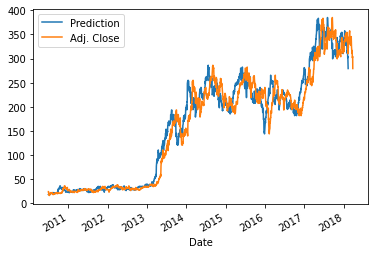

In [21]:
df.plot( y=['Prediction','Adj. Close'])
plt.show

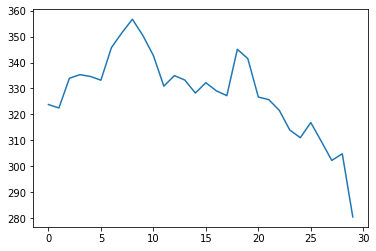

In [22]:
#simple plot of the 30 day prediction of the stock values
plt.plot(forecast_prediction)
plt.show()